In [3]:
import pandas as pd

data=pd.read_csv('TSLA.csv')

print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1    

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.drop(['Adj Close'],axis=1 , inplace=True)

In [9]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


data.isnull().sum()

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X=data[['Open' , 'High', 'Low', 'Volume']]
y=data['Close']

In [13]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [18]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)

print("R2 Score : " , r2)
r2_percent = r2 * 100
print("R² Score (%):", r2_percent)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error :", rmse)


R2 Score :  0.9997117604197447
R² Score (%): 99.97117604197447
Mean Squared Error :  4.379434894394391
Root Mean Squared Error : 2.0927099403391747


In [79]:


from datetime import timedelta, datetime
n_days = 5
last_row = X.iloc[-1].copy()
last_date = datetime(2025, 8, 18)

future_data = []

for i in range(n_days):
    next_close = model.predict([last_row])[0]
    
    next_open = last_row['Open'] * 1.002  
    next_high = last_row['High'] * 1.002
    next_low = last_row['Low'] * 1.002
    next_volume = last_row['Volume'] * 1.01  
    
    future_data.append({
        'Date': last_date.strftime('%Y-%m-%d'),
        'Open': next_open,
        'High': next_high,
        'Low': next_low,
        'Volume': next_volume,
        'Close': next_close
    })
    
    last_row['Open'] = next_open
    last_row['High'] = next_high
    last_row['Low'] = next_low
    last_row['Volume'] = next_volume
    last_date += timedelta(days=1)

future_df = pd.DataFrame(future_data)
print("\n\n\t\t\t\tNext 5 Days Stock Prediction\n\n")

print(future_df)
print("\n\n\n")



				Next 5 Days Stock Prediction


         Date        Open        High         Low        Volume       Close
0  2025-08-18  675.037382  787.712295  674.867060  4.753565e+07  774.626123
1  2025-08-19  676.387457  789.287720  676.216794  4.801101e+07  776.162116
2  2025-08-20  677.740232  790.866295  677.569228  4.849112e+07  777.701047
3  2025-08-21  679.095712  792.448028  678.924366  4.897603e+07  779.242923
4  2025-08-22  680.453904  794.032924  680.282215  4.946579e+07  780.787746






C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but

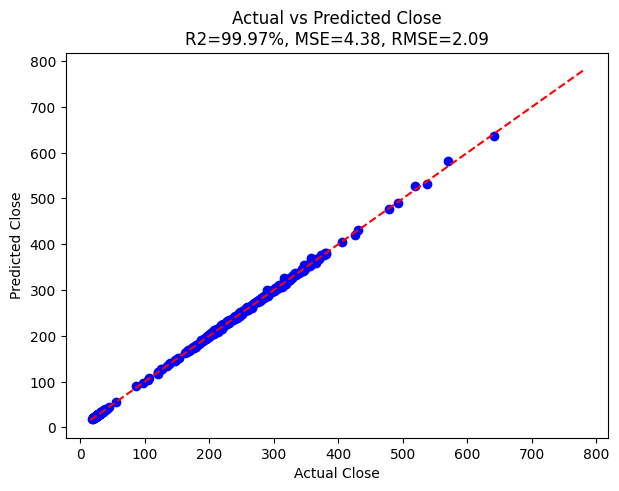

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.xlabel("Actual Close")
plt.ylabel("Predicted Close")
plt.title(f"Actual vs Predicted Close\nR2={r2_percent:.2f}%, MSE={mse:.2f}, RMSE={rmse:.2f}")
plt.show()

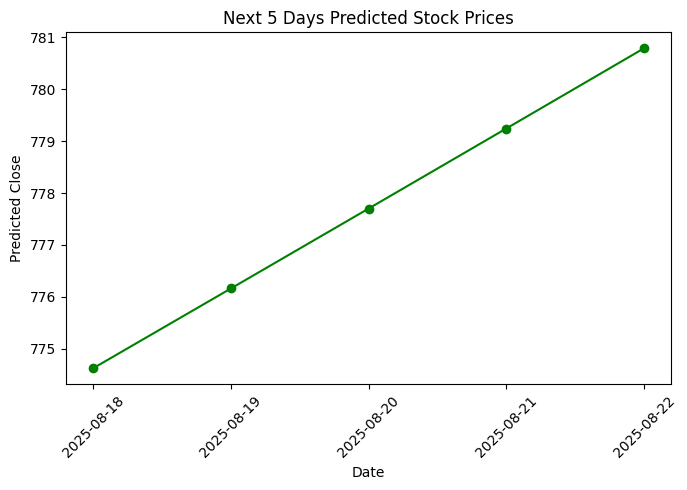

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(future_df['Date'], future_df['Close'], marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Predicted Close")
plt.title("Next 5 Days Predicted Stock Prices")
plt.tight_layout()
plt.show()